In [14]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.linear_model import Lasso
from sklearn.datasets import make_regression
import pandas as pd

In [15]:
data = pd.read_csv('freshman_kgs.csv')

In [16]:
x_1 = data.iloc[0:20, 1].values
x_2 = data.iloc[0:20, 2].values
x_3 = data.iloc[0:20, 3].values
y = data.iloc[0:20,4].values

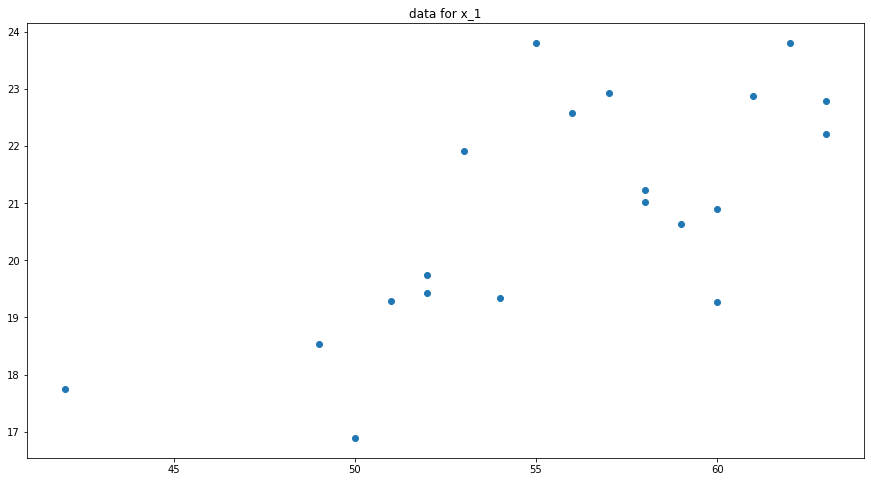

In [17]:
plt.figure(figsize = (15,8))
plt.plot(x_1, y, 'o')
plt.title("data for x_1")
plt.show()


In [18]:
m = x_1.shape[0]
x = np.hstack((np.ones((m, 1)), (x_1.reshape(m,1))))

In [19]:
x = np.hstack((x, ((x_2).reshape(m,1))))
x = np.hstack((x, ((x_3).reshape(m,1))))

In [20]:
mu = np.mean(x[:, 1:], axis=0)
sigma = np.std(x[:, 1:], axis=0)
x[:, 1:] = (x[:, 1:] - np.mean(x[:, 1:], axis=0)) / np.std(x[:, 1:], axis=0)


In [21]:
alpha = 0.05#standard value for alpha
beta = 0.5
theta = np.random.random(x.shape[1])#random initial value for  theta
def J(theta, x, y):  # modified error function
    j =  np.mean(np.square((x@theta.T) - y))
    abs_theta = np.absolute(theta)
    j += beta*np.mean(abs_theta)
    return j

In [23]:
err_old = J(theta, x, y)              #initialising the required variables
m_old = 1* (x.T @ ((x @ theta) - y))
theta = theta - alpha * (1/m) *m_old

In [25]:
m_new = m_old
err_new = J(theta, x, y)

In [26]:
ep = err_new*(0.0004)

In [27]:
k = 0#k is k is indicator wether error is minimised or not
while k != 1:
    m_new = 0.9* (x.T @ ((x @ theta) - y))+0.1*m_old +beta*np.sign(theta) #gradient descent with momentum amd
    theta = theta - alpha * m_new                                         #derivatives w.r.t.absolutes
    m_old = m_new
    err_new = J(theta, x, y)
    if abs(err_new-err_old) <= ep:   #1  
        k = 1
    err_old = err_new

In [28]:
expected = x@theta

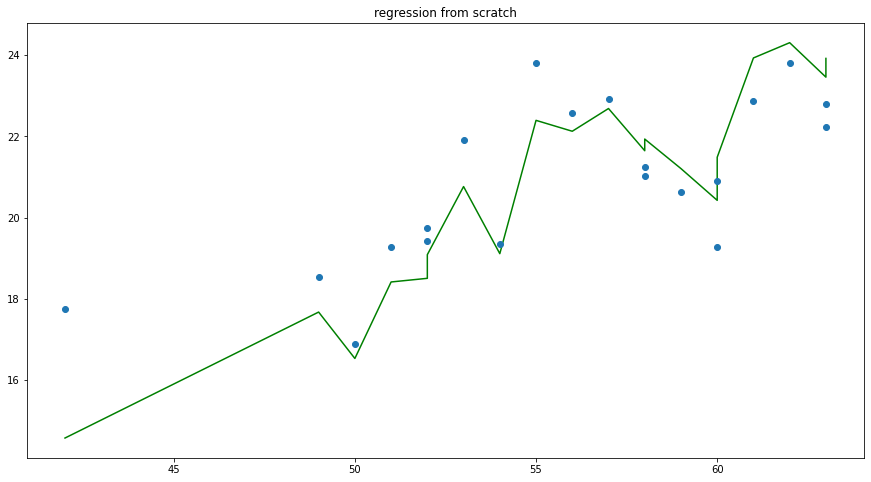

In [29]:
plt.figure(figsize = (15,8))
plt.title("regression from scratch")
plt.plot(x_1, expected, color = 'green')
plt.plot(x_1, y , 'o')
#plt.plot(x[:, 1], expected, color = 'green')
plt.show()

In [30]:
Polyreg = Lasso(alpha = 0.5)
Polyreg.fit(x, y)

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

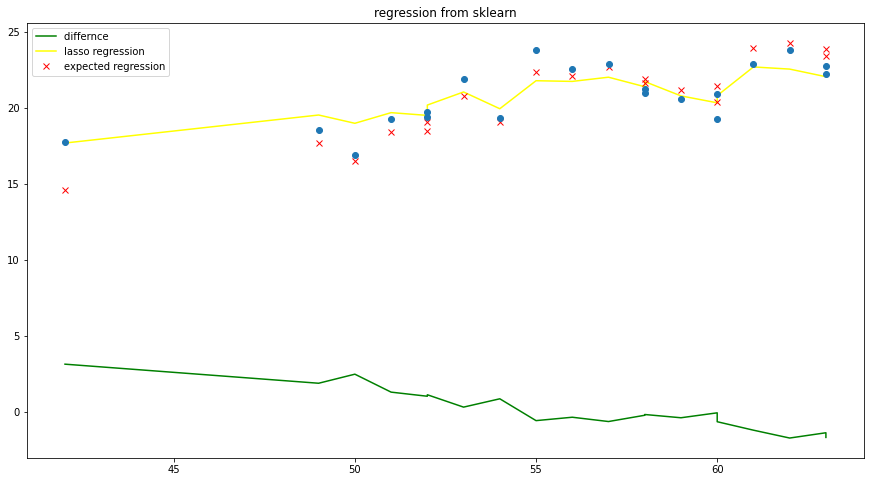

In [33]:
plt.figure(figsize = (15,8))
plt.title("regression from sklearn")
plt.plot(x_1, Polyreg.predict(x)-expected, color = 'green', label = 'differnce ')
plt.plot(x_1, Polyreg.predict(x), color = 'yellow', label = 'lasso regression')
plt.plot(x_1, expected, 'rx', label = 'expected regression')
plt.plot(x_1, y, 'o')
plt.legend()
plt.show()
#you can see wether 'x' lies on regression line or not